In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

lastdate = session.query(Measurement.date).\
        order_by(Measurement.date.desc()).first()

lastdate

('2017-08-23')

In [11]:
# Calculate the date 1 year ago from the last data point in the database
oneyearago = dt.date(2017,8,23) - dt.timedelta(days=365)
oneyearago

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores

prcpdata = session.query(Measurement.date, Measurement.prcp).\
       filter(Measurement.date >= oneyearago).\
       order_by(Measurement.date).all()
prcpdata

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

prcpdf = pd.DataFrame(prcpdata, columns = ["Date", "Precipitation"])
prcpdf.set_index("Date", inplace=True)
prcpdf.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


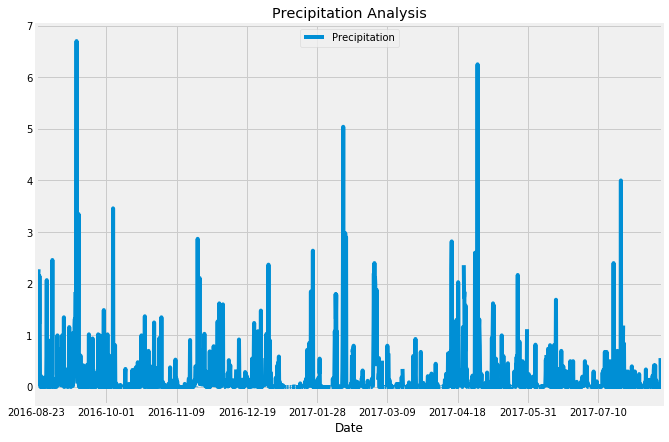

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

prcpdf.plot(title ="Precipitation Analysis", figsize=(10,7))
plt.legend(loc = "upper center")
plt.savefig("Precipitation.png")
plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcpdf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station.name).count()
stations

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activestations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
                                              
activestations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [func.min(Measurement.tobs), 
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

temperatures = session.query(*sel).\
      filter(Measurement.station == 'USC00519281').all()

temperatures

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempdata = session.query(Measurement.tobs, Measurement.date).\
       filter(Measurement.date >= oneyearago).filter(Measurement.station == 'USC00519281').\
       order_by(Measurement.date).all()

tempdatadf = pd.DataFrame(tempdata, columns=["Tobs", "Date"])
tempdatadf.head()

,Tobs,Date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27


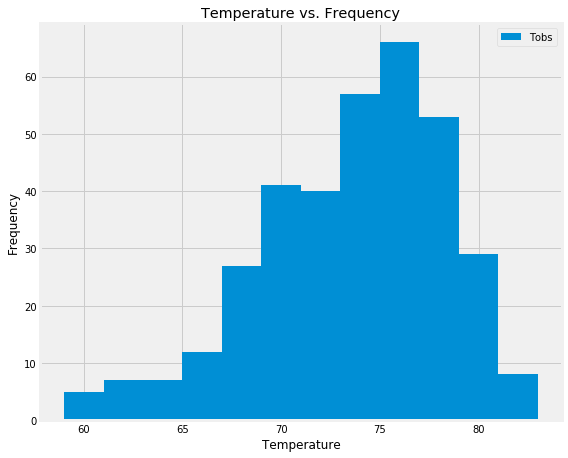

In [20]:
tempdatadf.plot.hist(bins=12, figsize=(8,6))
plt.tight_layout()

plt.title("Temperature vs. Frequency")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.savefig("temperature_vs_frequency.png", bbox_inches = 'tight')
plt.show() 


In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

mytrip = calc_temps("2017-05-01", "2017-05-10")
mytrip


[(65.0, 75.12280701754386, 80.0)]

In [23]:
# Create a Pandas DataFrame

mytripdf = pd.DataFrame(mytrip, columns=["TMIN", "TAVE", "TMAX"])
mytripdf


,TMIN,TAVE,TMAX
0,65.0,75.122807,80.0


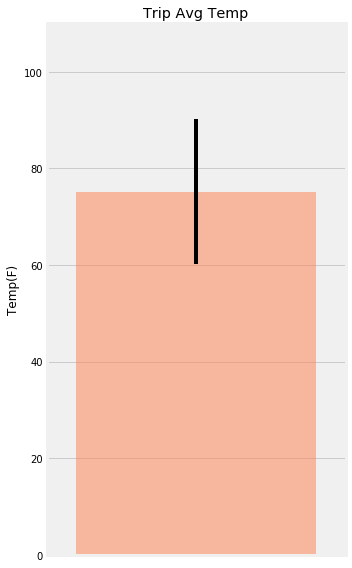

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

error = mytripdf["TMAX"] - mytripdf["TMIN"]

plt.figure(figsize=(5,8))
plt.bar(1, mytripdf["TAVE"], yerr=error, alpha=0.5, color="coral")
plt.xticks([])
plt.yticks(np.arange(0,120,20))
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
plt.tight_layout()
plt.xlim(0.5, 1.5)
plt.ylim(0,110)

plt.savefig("trip_avg_temperature.png", bbox_inches = 'tight')
plt.show()


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

stationprcp = session.query(
    Station.station, 
    Station.name, 
    Station.latitude, 
    Station.longitude, 
    Station.elevation, 
    func.avg(Measurement.prcp)
).filter(Measurement.station == Station.station, 
        Measurement.date.between("2017-05-01", "2017-05-10")
).group_by(Station.station
).order_by(func.avg(Measurement.prcp).desc()).all()

print(stationprcp)


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.28375000000000006), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.268), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.21555555555555556), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.207), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.081), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02888888888888889)]


## Optional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

tripdate = pd.date_range("2018-05-01", "2018-05-10")

datelist = [date.strftime("%m-%d") for date in tripdate]

normaltemp = [daily_normals(date)[0] for date in datelist]

normaltemp


[(65.0, 72.75925925925925, 79.0),
 (65.0, 73.05084745762711, 79.0),
 (67.0, 73.41071428571429, 84.0),
 (65.0, 73.59649122807018, 78.0),
 (67.0, 73.39655172413794, 79.0),
 (66.0, 73.14035087719299, 80.0),
 (64.0, 71.78846153846153, 79.0),
 (65.0, 72.18867924528301, 80.0),
 (67.0, 72.9322033898305, 79.0),
 (64.0, 73.3157894736842, 78.0)]

In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normaltempdf = pd.DataFrame(normaltemp, columns=["tmin", "tavg", "tmax"],  index=tripdate)
normaltempdf.index.name="date"
normaltempdf 

,tmin,tavg,tmax
date,,,
2018-05-01,65.0,72.759259,79.0
2018-05-02,65.0,73.050847,79.0
2018-05-03,67.0,73.410714,84.0
2018-05-04,65.0,73.596491,78.0
2018-05-05,67.0,73.396552,79.0
2018-05-06,66.0,73.140351,80.0
2018-05-07,64.0,71.788462,79.0
2018-05-08,65.0,72.188679,80.0
2018-05-09,67.0,72.932203,79.0


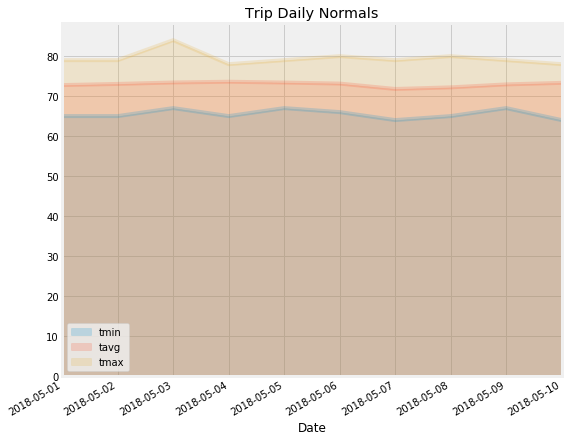

In [29]:
# Plot the daily normals as an area plot with `stacked=False`

normaltempdf.plot(kind='area', stacked=False, alpha=0.2, x_compat=True, figsize=(8,6))
plt.tight_layout()

plt.title("Trip Daily Normals")
plt.xlabel("Date")

plt.savefig("trp_daily_normals.png", bbox_inches = 'tight')
plt.show()


In [30]:
# The End